In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# <h1 style="text-align:center; color: #4164F0;">AXE 3 : Gender and Ethnic Representation</h1>

This part of the project aims to shed light on potential gender disparities in the movie industy. Comparing America with Europe 

### Loading and Preparing the Movie Actor Gender Data and Movie Actor Ethnicity Data

In [86]:
MOVIE_METADATA_PATH= '../MovieSummaries/movie.metadata.tsv'
CHARACTER_METADATA_PATH= '../MovieSummaries/character.metadata.tsv'
MERGED_MOVIE_METADATA_PATH='data/Utils/merged_movie_metadata.csv'

# Load data
movie_metadata = pd.read_csv(MOVIE_METADATA_PATH, sep='\t', header=None, names=['Wikipedia_ID', 'Freebase_ID', 'Movie_Name', 'Release_Date', 'Box_Office_Revenue', 'Runtime', 'Languages', 'Countries', 'Genres'])

character_metadata = pd.read_csv(CHARACTER_METADATA_PATH, sep='\t', header=None, names=['Wikipedia_ID', 'Freebase_ID', 'Release_Date', 'Character_Name', 'Actor_Birth_Date', 'Actor_Gender', 'Actor_Height', 'Actor_Ethnicity', 'Actor_Name', 'Actor_Age', 'Character_Actor_Freebase_ID', 'Character_Freebase_ID', 'Actor_Freebase_ID'])

full_movie_metadata = pd.read_csv(MERGED_MOVIE_METADATA_PATH)


In [87]:
print("=====MOVIE METADATA=====")
display(movie_metadata.shape, movie_metadata.head(2))
print("=====CHAR. METADATA=====")
display(character_metadata.shape,character_metadata.head(2))
print("=====MERGED MOVIE METADATA=====")
display(full_movie_metadata.shape, full_movie_metadata.head(2))

=====MOVIE METADATA=====


(81741, 9)

,Wikipedia_ID,Freebase_ID,Movie_Name,Release_Date,Box_Office_Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."


=====CHAR. METADATA=====


(450669, 13)

,Wikipedia_ID,Freebase_ID,Release_Date,Character_Name,Actor_Birth_Date,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age,Character_Actor_Freebase_ID,Character_Freebase_ID,Actor_Freebase_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.78,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4


=====MERGED MOVIE METADATA=====


(13786, 33)

,Wikipedia_ID,Movie_Name,Release_Date,Box_Office_Revenue,Runtime,Languages,Countries,Genres,Continents,Year,...,Production,Website,Response,totalSeasons,Oscar,Nomination_Awards,Win_Awards,Internet_Movie_Database_Rating,Rotten_Tomatoes_Rating,Metacritic_Rating
0,13696889,The Gangsters,1913-05-29,NaN,35.0,"['Silent film', 'English Language']",['United States of America'],"['Short Film', 'Silent film', 'Indie', 'Black-...",['America'],1957,...,NaN,NaN,True,NaN,0,0,0,5.9,NaN,NaN
1,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",['America'],1938,...,NaN,NaN,True,NaN,1,6,1,6.8,8.3,NaN


### Visualising Data

#### 0. Functions

In [88]:
def plot_frequencie_proportion(data, title, xlabel, color="skyblue", figsize=(8, 6)):
    """
    Plot a bar chart for distribution with proportion labels.

    Parameters:
    - data: pd.Series - A pandas Series
    - title: str - Title of the plot.
    - color: str - Color of the bars (default: "skyblue").
    - figsize: tuple - Size of the plot (default: (8, 4)).
    """
    # Calculate counts and proportions
    total_count = data.sum()
    proportions = (data / total_count).values  # Proportions as percentages

    # Create the figure
    plt.figure(figsize=figsize)
    ax = data.plot(kind="bar", color=color)
    ax.set_title(title, fontsize=16, fontweight="bold")
    ax.set_xlabel(xlabel, fontsize=14, fontweight="bold")
    ax.set_ylabel("Frequency", fontsize=14, fontweight="bold")
    ax.tick_params(axis='x', rotation=45)

    # Add proportion labels
    rects = ax.patches
    for rect, label in zip(rects, proportions):
        ax.text(
            rect.get_x() + rect.get_width() / 2,  # X position
            rect.get_height(),  # Y position (center of the bar)
            f"{label:.2%}",  # Format as a percentage
            ha="center",  # Horizontally center-aligned
            va="bottom",  # Vertically center-aligned
            fontsize=10  # Font size
        )

    plt.tight_layout()
    plt.show()

#Bar Plot of Frequency of Ethnicities
def plot_frequencie(data, title, xlabel, color="skyblue", figsize=(8, 6)):
    """
    Plot a bar chart for distribution

    Parameters:
    - data: pd.Series - A pandas Series
    - title: str - Title of the plot.
    - color: str - Color of the bars (default: "skyblue").
    - figsize: tuple - Size of the plot (default: (8, 4)).
    """
    plt.figure(figsize=figsize)
    bars = plt.bar(data.index, data.values, color=color)
    
    # Add value labels to each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # X position
            height,  # Y position (slightly above the bar)
            f'{height}',  # Text label (rounded to 1 decimal place)
            ha='center',  # Center align text
            va='bottom',  # Align text at the bottom
            fontsize=10  # Font size
        )
    plt.bar(data.index, data.values, color=color)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14, fontweight='bold')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#Bar Plot of Percentage of Ethnicities
def plot_proportion(data, title, xlabel, color="skyblue", figsize=(8, 6)):
    proportion= (data / data.sum())*100
    plt.figure(figsize=figsize)
    bars = plt.bar(data.index, proportion.values, color=color)
    
    # Add value labels to each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # X position
            height,  # Y position (slightly above the bar)
            f'{height:.2f}%',  # Text label (rounded to 1 decimal place)
            ha='center',  # Center align text
            va='bottom',  # Align text at the bottom
            fontsize=10  # Font size
        )

    # Add title and labels
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14, fontweight='bold')
    plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_gender_distribution_regions(data, title, bar_width=0.25, figsize=(10, 6)):
    """
    Plots gender distribution across America, Europe, and Both regions with percentages.

    Parameters:
    - data: pd.DataFrame - DataFrame containing the data.
    - title: str - Title of the plot.
    - bar_width: float - Width of the bars (default: 0.25).
    - figsize: tuple - Size of the plot (default: (10, 6)).
    """
    # Define fixed regions, their filtering logic, and colors
    regions = {
        "America": {"filter": lambda x: 'America' in x, "color": "skyblue"},
        "Europe": {"filter": lambda x: 'Europe' in x, "color": "lightgreen"},
        "Both": {"filter": lambda x: 'Both' in x, "color": "salmon"}
    }

    # Dynamically infer categories from the data
    all_categories = ['M', 'F']  # Explicitly define the order
    x_positions = np.arange(len(all_categories))
    positions = {region: x_positions + i * bar_width for i, region in enumerate(regions.keys())}

    plt.figure(figsize=figsize)

    # Process each region and plot
    for region, config in regions.items():
        # Filter the data for the region
        region_data = data[data['Continents'].apply(config["filter"])]
        gender_counts = region_data['Actor_Gender'].value_counts()
        total_count = region_data['Actor_Gender'].count()

        # Calculate percentages for all categories
        percentages = [(gender_counts.get(cat, 0) / total_count) * 100 for cat in all_categories]

        # Plot bars for the region
        plt.bar(positions[region], percentages, width=bar_width, label=region, color=config["color"])

        # Add percentage labels
        for x, y, cat in zip(positions[region], percentages, all_categories):
            plt.text(x, y, f"{y:.1f}%", ha="center", va="bottom", fontsize=10)

    # Customize the plot
    plt.title(title, fontsize=16, fontweight="bold")
    plt.xlabel("Gender", fontsize=14)
    plt.ylabel("Percentage (%)", fontsize=14)
    plt.xticks(x_positions + (len(regions) - 1) * bar_width / 2, all_categories)  # Center group labels
    plt.legend(title="Region")
    plt.tight_layout()

    plt.show()

#### 1. Genders

In [89]:
gender_count=character_metadata['Actor_Gender'].value_counts(dropna = False)
display(gender_count.head(4).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actor Gender</b>'))

,count
Actor_Gender,
M,270257
F,134803
nan,45609


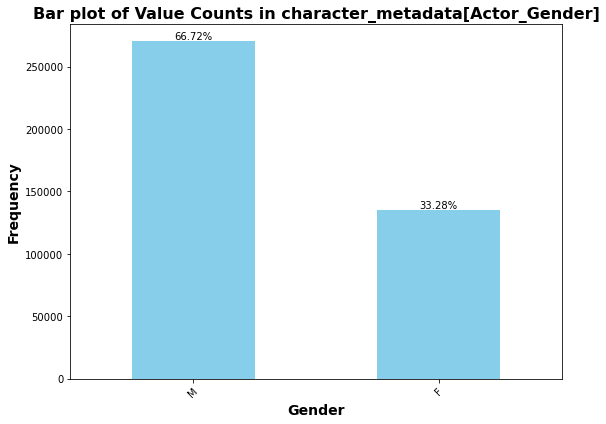

In [90]:
# Calculate gender counts
gender_count = character_metadata['Actor_Gender'].value_counts()

# Plot the gender distribution
plot_frequencie_proportion(
    data=gender_count,
    title="Bar plot of Value Counts in character_metadata[Actor_Gender]",
    xlabel="Gender"
)


##### Merging Data
Merge Actor_Gender and Actor_Freebase_ID on Wikipedia_ID of the movies_metadata in order to creat a DataFrame consisting of all movies associated with gendered actors

In [91]:
full_movie_metadata_actor_gender = full_movie_metadata.merge(
    character_metadata[['Wikipedia_ID', 'Actor_Gender', 'Actor_Freebase_ID']],
    on='Wikipedia_ID',
    how='left'
)


In [92]:
full_movie_metadata_actor_gender_american=full_movie_metadata_actor_gender[full_movie_metadata_actor_gender['Continents'].apply(lambda x: 'America'in x)]
gender_count_a=full_movie_metadata_actor_gender_american['Actor_Gender'].value_counts(dropna = False)
display(gender_count_a.head(30).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actor Gender (America)</b>'))

full_movie_metadata_actor_gender_europe=full_movie_metadata_actor_gender[full_movie_metadata_actor_gender['Continents'].apply(lambda x: 'Europe'in x)]
gender_count_e=full_movie_metadata_actor_gender_europe['Actor_Gender'].value_counts(dropna = False)
display(gender_count_e.head(30).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actor Gender (Europe)</b>'))

full_movie_metadata_actor_gender_both=full_movie_metadata_actor_gender[full_movie_metadata_actor_gender['Continents'].apply(lambda x: 'Both'in x)]
gender_count_b=full_movie_metadata_actor_gender_both['Actor_Gender'].value_counts(dropna = False)
display(gender_count_b.head(30).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actor Gender (Both)</b>'))

,count
Actor_Gender,
M,52302
F,27092
nan,6978


,count
Actor_Gender,
M,11525
F,6013
nan,3336


,count
Actor_Gender,
M,6004
F,3374
nan,709


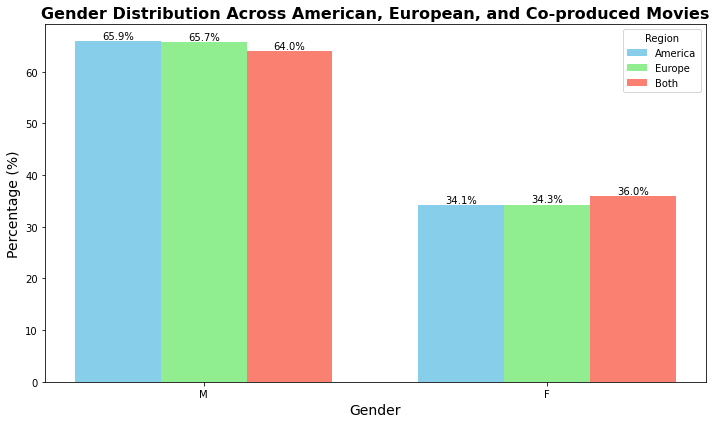

In [93]:
plot_gender_distribution_regions(
    data=full_movie_metadata_actor_gender,
    title="Gender Distribution Across American, European, and Co-produced Movies"
)

We see very similar proportions for gender repartition in European and American movies. <br>
Further reaserch will focus on:
- The evolution of this proportion at different time periods in the two movie industries.
- The types of comedies where a significantly different proportion is observed on the two contients.
- Look for correlations in movie recognition (boxoffice/rankings/ratings/awards) and gender repatition.

#### 2. Ethnicity

In [94]:
display(character_metadata['Actor_Ethnicity'].value_counts(dropna = False).head(10).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actor Ethnicities</b>'))

,count
Actor_Ethnicity,
nan,344611
/m/0dryh9k,16351
/m/0x67,10159
/m/041rx,10121
/m/02w7gg,6165
/m/033tf_,3857
/m/0xnvg,2956
/m/02ctzb,2307
/m/07hwkr,2250


#### This huge proportion of NaN is an issue, the first future step for this part would be to focus on treating these NaN. Since actors appear multiple times in character_metadata, Actor_Ethnicity might be taken from other occurence of this actor in the data.
For now we just drop the NaN values

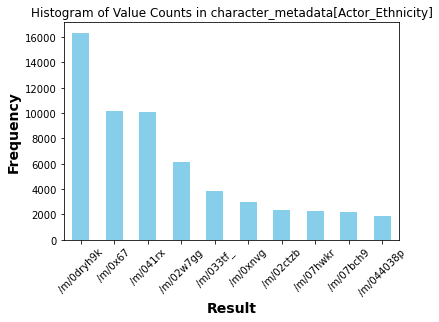

In [95]:
ethnicity_count=character_metadata['Actor_Ethnicity'].value_counts().head(10)
# Plot the histogram
ethnicity_count.plot(kind='bar', color='skyblue')
plt.title('Histogram of Value Counts in character_metadata[Actor_Ethnicity]')
plt.xlabel('Result', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Frequency', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xticks(rotation=45)
plt.show()

All ethnicities are named with a Freebase_ID, we need to map Ethnicities to corresponding Freebase_ID

Load and treating the mappings of Freebase_ID to Ethnicity

In [96]:
ethnicity_map=pd.read_csv("data/ethnicity_mappings.csv")
# Add a leading slash to Freebase_ID in ethnicity_map
ethnicity_map['freebase_id'] = ethnicity_map['freebase_id'].apply(lambda x: f'/{x}' if not x.startswith('/') else x)
ethnicity_map.head(3)


,freebase_id,ethnicity
0,/m/0x67,African Americans
1,/m/064b9n,Omaha Tribe of Nebraska
2,/m/041rx,Jewish people


In [97]:
# Convert the ethnicity_map DataFrame into a dictionary for mapping
ethnicity_dict = ethnicity_map.set_index('freebase_id')['ethnicity'].to_dict()

# Map the Freebase IDs in character_metadata to their ethnicities
character_metadata['Actor_Ethnicity'] = character_metadata['Actor_Ethnicity'].map(ethnicity_dict)


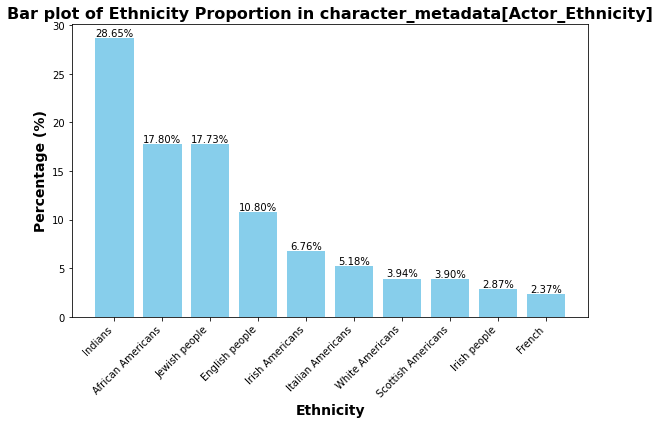

In [98]:
ethnicity_count=character_metadata['Actor_Ethnicity'].value_counts().head(10)
plot_proportion(ethnicity_count, "Bar plot of Ethnicity Proportion in character_metadata[Actor_Ethnicity]", "Ethnicity")

##### Merging Data
Merge Actor_Ethnicity and Actor_Freebase_ID on Wikipedia_ID of the movies_metadata in order to create a DataFrame consisting of all movies associated with informtaion about ethnicitiy of actors.

In [99]:
full_movie_metadata_actor_ethnic = full_movie_metadata.merge(
    character_metadata[['Wikipedia_ID', 'Actor_Ethnicity', 'Actor_Freebase_ID']],
    on='Wikipedia_ID',
    how='left'
)
full_movie_metadata_actor_ethnic.head(3)

,Wikipedia_ID,Movie_Name,Release_Date,Box_Office_Revenue,Runtime,Languages,Countries,Genres,Continents,Year,...,Response,totalSeasons,Oscar,Nomination_Awards,Win_Awards,Internet_Movie_Database_Rating,Rotten_Tomatoes_Rating,Metacritic_Rating,Actor_Ethnicity,Actor_Freebase_ID
0,13696889,The Gangsters,1913-05-29,NaN,35.0,"['Silent film', 'English Language']",['United States of America'],"['Short Film', 'Silent film', 'Indie', 'Black-...",['America'],1957,...,True,NaN,0,0,0,5.9,NaN,NaN,Scottish Americans,/m/0k57l
1,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",['America'],1938,...,True,NaN,1,6,1,6.8,8.3,NaN,NaN,/m/0pkw7
2,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",['America'],1938,...,True,NaN,1,6,1,6.8,8.3,NaN,French Americans,/m/02s58t


In [100]:
# Filter rows where 'Continents' is one of 'America', 'Europe', or 'Both'
full_movie_metadata_actor_ethnic_filtered = full_movie_metadata_actor_ethnic[full_movie_metadata_actor_ethnic['Continents'].apply(lambda x: 'America'in x or 'Europe' in x or 'Both' in x)]

In [101]:
full_movie_metadata_char_ethnic_american=full_movie_metadata_actor_ethnic[full_movie_metadata_actor_ethnic['Continents'].apply(lambda x: 'America'in x)]
ethnicity_count_a=full_movie_metadata_char_ethnic_american['Actor_Ethnicity'].value_counts()
display(ethnicity_count_a.head(5).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actor Ethnicity (America)</b>'))

full_movie_metadata_char_ethnic_europe=full_movie_metadata_actor_ethnic[full_movie_metadata_actor_ethnic['Continents'].apply(lambda x: 'Europe'in x)]
ethnicity_count_e=full_movie_metadata_char_ethnic_europe['Actor_Ethnicity'].value_counts()
display(ethnicity_count_e.head(5).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actor Ethnicity (Europe)</b>'))

full_movie_metadata_char_ethnic_both=full_movie_metadata_actor_ethnic[full_movie_metadata_actor_ethnic['Continents'].apply(lambda x: 'Both'in x)]
ethnicity_count_b=full_movie_metadata_char_ethnic_both['Actor_Ethnicity'].value_counts()
display(ethnicity_count_b.head(5).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actor Ethnicity (Both)</b>'))

,count
Actor_Ethnicity,
Jewish people,4121
African Americans,4088
Irish Americans,1634
Italian Americans,1335
Scottish Americans,1089


,count
Actor_Ethnicity,
English people,829
Jewish people,292
Italians,239
French,205
White British,110


,count
Actor_Ethnicity,
English people,596
Jewish people,408
African Americans,254
Irish Americans,190
Italian Americans,183


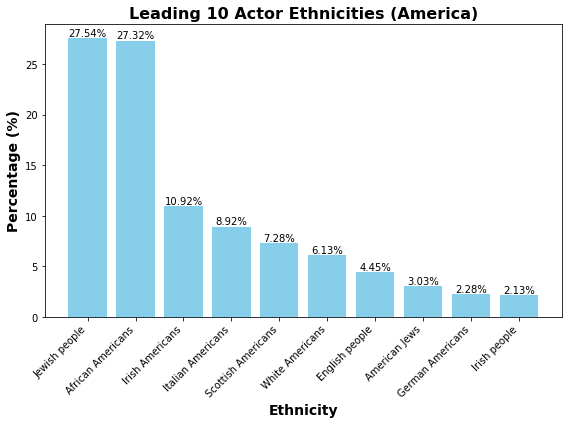

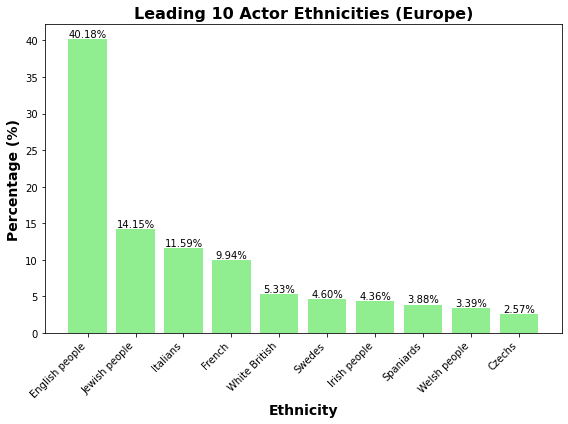

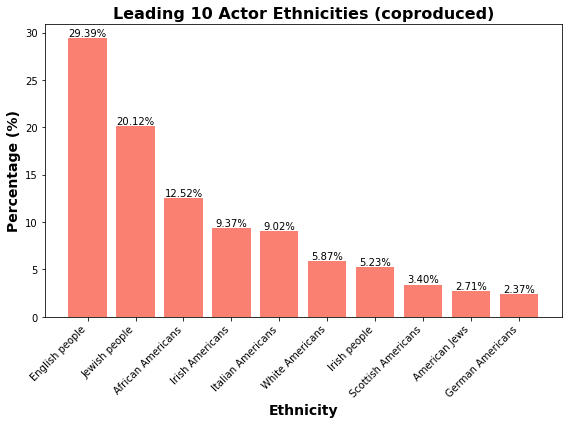

In [102]:
i=10
plot_proportion(ethnicity_count_a.head(i),title=f'Leading {i} Actor Ethnicities (America)', xlabel="Ethnicity",color='skyblue')
plot_proportion(ethnicity_count_e.head(i), title=f'Leading {i} Actor Ethnicities (Europe)', xlabel="Ethnicity",color='lightgreen')
plot_proportion(ethnicity_count_b.head(i), title=f'Leading {i} Actor Ethnicities (coproduced)', xlabel="Ethnicity",color='salmon')

We see very different proportions for ethic repartition of actors in European and American movies. <br>
Future step invole creating broader ethnic cathegories to have simplified but more accurate representation of the movie industry ethnic landscape.
Further reaserch will focus on:
- The evolution of these varying proportions at different time periods in the two movie industries.
- The types of comedies where a significantly different proportion is observed on the two contients.
- Look for correlations in movie recognition (boxoffice/rankings/ratings/awards) and ethnical diversity in the cast.